# 李鲁鲁老师的Python课程 第二课

项目主页: https://github.com/LC1332/Learn-Python-with-GPT

- [ ] 条件语句的基础
- [ ] 获取一个frame
- [ ] 判断frame上是否有人脸
- [ ] 根据人脸的位置进行KTV闪烁

#

我想对第二课前后进行比较大的修改，

主要是目前的第二节课会引入太多“老师提前编写的函数”

我们计划在第一节课之后，我们来上一节 “循环与物理模拟”

然后再跟进一节 “分支语句与三门问题”

# 条件语句

因为我们这个课是会随着学期的python课同步展开，或者同学们已经在上一个学期学过Python的课程

这样我们在这套课里面，会更多注重 利用ChatGPT这样的工具进行协同编程

（实际上大多数情况下，同学更多是在输入提示词，而不是程序）

不过作为self-contain的一门课程，我们还是可以讲一些基础

我们在ChatGPT（或者ChatGLM等工具，下同）中输入下面的提示词

```
给我实现一个简易的Python的分支语句的句子，再向我解释分支语句的相关知识
```

## ChatGPT的输出

下面是一个简易的Python分支语句示例：

```python
# 定义一个变量
temperature = 25

# 分支语句
if temperature > 30:
    print("It's a hot day")
elif temperature > 20:
    print("It's a warm day")
else:
    print("It's a cool day")
```

<details>
  <summary>...更多ChatGPT的输出</summary>

### 分支语句的相关知识

分支语句（Branching Statements）是控制程序流程的一种方式，根据条件来决定执行不同的代码块。在Python中，常见的分支语句有`if`、`elif`和`else`。

1. **if语句**：用于判断一个条件是否为真。如果条件为真，则执行相应的代码块。

    ```python
    if 条件:
        执行代码
    ```

2. **elif语句**：表示“否则，如果”的意思，用于检查另一个条件。如果前面的条件不满足，则检查这个条件。如果这个条件为真，则执行相应的代码块。

    ```python
    if 条件1:
        执行代码1
    elif 条件2:
        执行代码2
    ```

3. **else语句**：表示“否则”的意思。当所有前面的条件都不满足时，执行else代码块中的内容。

    ```python
    if 条件1:
        执行代码1
    elif 条件2:
        执行代码2
    else:
        执行代码3
    ```

### 示例解释

在上面的代码中，我们首先定义了一个变量`temperature`，并将其值设置为25。然后我们使用`if`、`elif`和`else`分支语句来判断温度，并根据不同的温度值打印相应的消息。

- 如果`temperature`大于30，则打印“It's a hot day”。
- 如果`temperature`大于20但不超过30，则打印“It's a warm day”。
- 如果`temperature`小于或等于20，则打印“It's a cool day”。

通过分支语句，我们可以根据不同的条件执行不同的代码，从而实现程序的逻辑控制。

</details>

确实已经很详细了，如果没有Python基础的同学，可以继续查看这个里面的描述哈

我们可以尝试在Notebook中运行这段代码

In [1]:
# 定义一个变量
temperature = 25

# 分支语句
if temperature > 30:
    print("It's a hot day")
elif temperature > 20:
    print("It's a warm day")
else:
    print("It's a cool day")


It's a warm day


但是这个例子太无聊了！

我们在这节课上会引入两个函数，一个是`capture_frame()`，一个是`detect_face()`

然后再结合分支语句，来实现一些有趣的应用

让我们先来看capture_frame()函数

## Capture_frame()

我们尝试看一下这个函数的运行效果

当然我们这个课是需要摄像头的，如果没有摄像头的话，很多效果都会减弱

In [5]:
from src.capture_frame import capture_frame

frame = capture_frame()

print(frame.shape)


(480, 640, 3)


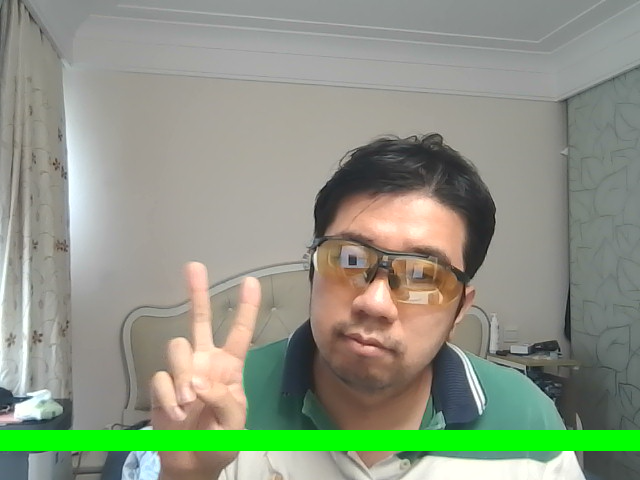

In [4]:
from src.capture_frame import display_frame_in_notebook

display_frame_in_notebook(frame)

frame = capture_frame() 可以获取摄像头的一张照片

（注意弹出的窗口） ，当然如果你觉得拍照的进度条时间太长了，可以调整中间的参数

然后我们还实现了一个display_frame_in_notebook(frame)这个函数

方便我们在notebook里面看到这个照片。

这里注意到我们从src文件夹下的capture_frame.py里面，引入了这两个函数

```python
from src.capture_frame import capture_frame
from src.capture_frame import display_frame_in_notebook
```

这使得我们可以把一个函数封装到一个文件里面，通过import额外引入

这两个函数是老师为了讲课方便，提前实现的，并且这两个函数，其实也是由ChatGPT去辅助编写的

我们后面马上会有一节课程，教同学们先编写这样的函数，再编写更完整的程序

不过在这节课里，我们先仅仅关注于这些函数的调用

我们马上再引入一个函数 detect_one_face( frame )

## detect_one_face( frame )

In [6]:
from src.detect_face import detect_one_face

x, y = detect_one_face(frame)

print(x, y)

360 261


这里我们实现了一个方便的函数，只检测画面中最大的人脸，并且返回人脸中心点的坐标

如果画面中没有人脸，就返回-1，-1

## mask函数

这里还要额外教大家一个mask函数

我们来看一看mask函数的效果

In [ ]:
from src.mask_frame import mask
masked_frame = mask(frame, "r")
display(masked_frame)

mask函数的作用，就是给图片加上红、绿、蓝的滤镜

## 凑在一起

我们可以把前面这些代码凑在一起

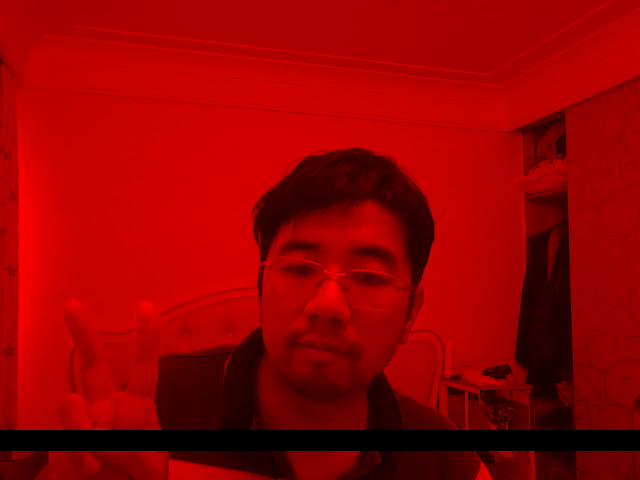

332 289


In [1]:
from src.capture_frame import capture_frame, display_frame_in_notebook
from src.detect_face import detect_one_face
from src.mask_frame import mask

frame = capture_frame(5)

x, y = detect_one_face(frame)

masked_frame = mask(frame, "r")

display_frame_in_notebook(masked_frame)

print(x, y)

显然这是可以工作的-o-~

这里我们想复现我们之前设计的一个经典案例，用摄像头来检测人脸坐标

如果画面里有人脸，我们就把画面整体渲染成红色

那我们要怎么做呢？

我们先确保之前的程序是可以正常运行的

然后我们需要建立一个prompt，一般来说，李鲁鲁老师会这样构造prompt

```
已知下面的程序可以正常运行

{python程序}

{新的编程的需求}

请帮助我实现
```

那么我们新的需求是什么呢？

- 我们希望重新写一个实时的摄像头循环
- 我们希望在摄像头上显示左右镜像的图像
- 我们希望去检测画面中是否出现人脸
- 如果x,y大于等于0 说明出现了人脸，则调用mask(frame,"r")把画面渲染成红色


对于第一点，其实我们在前一节课已经体验过了

第二点你不强调也可以，

这里比较难的是第四点，但是显然自然语言的这句话也会比程序容易理解多了

下面让我们来看完整的prompt

## 完整的prompt

---

下面这段代码已经可以完整运行

```python
from src.capture_frame import capture_frame, display_frame_in_notebook
from src.detect_face import detect_one_face
from src.mask_frame import mask

frame = capture_frame(5)

x, y = detect_one_face(frame)

masked_frame = mask(frame, "r")

display_frame_in_notebook(masked_frame)

print(x, y)
```

我希望参考这段代码重新实现一个程序

- 我们希望重新写一个实时的摄像头循环
- 我们希望在摄像头上显示左右镜像的图像
- 我们希望去检测画面中是否出现人脸
- 如果x,y大于等于0 说明出现了人脸，则调用mask(frame,"r")把画面渲染成红色

请用python为我实现

---


自动生成的代码是这样的

In [2]:
import cv2
from src.capture_frame import capture_frame, display_frame_in_notebook
from src.detect_face import detect_one_face
from src.mask_frame import mask

def main():
    # 打开摄像头
    cap = cv2.VideoCapture(0)
    
    if not cap.isOpened():
        print("无法打开摄像头")
        return
    
    while True:
        # 捕获帧
        ret, frame = cap.read()
        
        if not ret:
            print("无法读取帧")
            break
        
        # 镜像翻转帧
        frame = cv2.flip(frame, 1)
        
        # 检测人脸
        x, y = detect_one_face(frame)
        
        # 如果检测到人脸，则应用红色mask
        if x >= 0 and y >= 0:
            frame = mask(frame, "r")
        
        # 显示帧
        cv2.imshow('Camera', frame)
        
        # 按下 'q' 键退出循环
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    # 释放摄像头并关闭所有窗口
    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


## 进一步深入了解mask函数

mask函数还支持left和right参数

但是 我们其实并不希望每一次都是老师告诉你们 一个项目中特定的函数是干什么的

我们可以借助ChatGPT来研究这一点

mask这个函数的位置在 src/mask_frame.py里面

那么我们可以输入下面的prompt


---

查看下面的mask函数

```python
def mask(frame, color_name, left=0, right=1):
    # 获取图像的高度和宽度
    height, width, _ = frame.shape

    # 计算要保留的区域的起始和结束位置
    left_idx = int(left * width)
    right_idx = int(right * width)

    # copy from frame
    masked_frame = frame.copy()

    # 选择保留的颜色通道
    if color_name == 'r':
        channel_idx = 2  # 红色通道
    elif color_name == 'g':
        channel_idx = 1  # 绿色通道
    elif color_name == 'b':
        channel_idx = 0  # 蓝色通道
    else:
        raise ValueError("color_name must be one of 'r', 'g', or 'b'")

    # 复制指定区域的指定通道值到新图像
    for channel in range(3):
        if channel == channel_idx:
            # masked_frame[:, left_idx:right_idx, channel_idx] = frame[:, left_idx:right_idx, channel_idx]
            pass
        else:
            masked_frame[:, left_idx:right_idx, channel] = 0

    return masked_frame
```

告诉我mask函数的功能，以及他是如何调用的

---

<details>
<summary> ChatGPT的输出是这样的 </summary>
`mask` 函数的功能是对输入的图像 `frame` 进行处理，保留指定的颜色通道（红色、绿色或蓝色）在指定的水平范围内，其余部分将被设置为黑色。该函数通过传入颜色名称和水平范围来确定需要保留的颜色通道和区域。

函数的具体调用方式如下：
1. `frame`: 输入的图像，是一个三维数组（高度、宽度、颜色通道）。
2. `color_name`: 指定要保留的颜色通道，可以是 'r'（红色）、'g'（绿色）或 'b'（蓝色）。
3. `left` 和 `right`: 指定水平范围的起始和结束位置，范围为 0 到 1，表示图像宽度的比例。

以下是函数的详细步骤：

1. 获取图像的高度和宽度。
2. 计算要保留的区域的起始和结束位置的像素索引。
3. 创建图像的副本以进行处理。
4. 根据 `color_name` 确定要保留的颜色通道索引。
5. 遍历所有颜色通道：
   - 如果当前通道是指定的颜色通道，则保留该通道在指定区域的像素值（代码中被注释掉的部分）。
   - 否则，将该通道在指定区域的像素值设置为 0（黑色）。

最后返回处理后的图像 `masked_frame`。

示例调用：

```python
import cv2
import matplotlib.pyplot as plt

# 读取图像
frame = cv2.imread('image.jpg')

# 调用mask函数，只保留红色通道的中间一半区域
masked_image = mask(frame, 'r', left=0.25, right=0.75)

# 显示原图和处理后的图像
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Masked Image')
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))

plt.show()
```

请注意，示例代码使用了 `cv2.imread` 来读取图像，并使用 `matplotlib` 来显示原图和处理后的图像。调用 `mask` 函数时，参数 `'r'` 表示只保留红色通道，`left=0.25` 和 `right=0.75` 表示保留中间一半区域（从宽度的25%到75%）。

</details>

这里很重要的一点是

我们知道了mask函数可以使用

```python
# 调用mask函数，只保留红色通道的中间一半区域
masked_image = mask(frame, 'r', left=0.25, right=0.75)
```

这种方式调用

## 进一步修改程序

所以我们想要进一步修改之前的人脸检测程序

我们想要人脸如果在画面左边

就调用 masked_image = mask(frame, 'r', left=0, right=0.5) 来进行渲染

如果人脸在画面右边

就调用 masked_image = mask(frame, 'b', left=0.5, right=1) 来进行渲染

这样这个程序整体就会更有趣

我们来试试看吧。

In [3]:
# 结合之前的程序进行实践

这里我们就是希望诱导ChatGPT

去修改之前简单的分支

```python
# 如果检测到人脸，则应用红色mask
        if x >= 0 and y >= 0:
            frame = mask(frame, "r")
```

变为考虑x的位置 分情况有两种不同的渲染模式

## 总结

这节课我们先学习了分支函数

然后再学习了人脸检测、渲染函数之后，

利用分支函数，实现了人脸在画面不同位置进行不同的渲染

当然 这套课程的学习和一般的编程课程是有所不同的

结合ChatGPT之后，我们并没有去仔细地考虑“我要如何实现好一个分支语句”

而是更多的关注在如何用自然语言去描述分支。

---

关于其他库函数

在之前的《科创前置课》中，我们隐藏了所有的import

这样在教学上也有一定的好处，可以让学生更关注关键程序的本身

但是之前的方式极大程度降低了学生学到的代码迁移到其他平台的可能性

在现在的课程设计中，我们不再避讳使用import

并且，这些import的文件，学生也是可以实际看到

并且这些函数本身，也是用ChatGPT辅助编写的，对应的prompt我们都留在这个notebook文件的附录中

有兴趣的同学可以进一步参考对应的prompt编写代码的过程。

在更后面的课程中，我们也会教同学们编写自己的额外的函数再import，这种方式可以更方便地在协同编程地语境下，构建更大地项目。

---

## 附录: capture_frame函数

这节课中会引入capture_frame()函数，这个函数我们希望完全用ChatGPT来编写，具体的prompt是这样的

```
我希望实现一个capture_frame() 函数


这个函数会打开一个摄像头，在摄像头上显示左右镜像过的画面

同时，在frame上回渲染一个进度条，进度条随着时间会从左到右运行，总共10秒

10秒后会记录frame，release掉camera对象，并且return记录下来的frame
```

## 附录: display_frame_in_notebook( frame )函数

```
为我实现一个display_frame_in_notebook( frame )函数

接受一个opencv camera获取到的frame，展示到notebook中
```

## 附录: detect_one_face( frame )函数

```
我希望实现一个detect_one_face( frame )函数

利用opencv对frame中的人脸进行检测，对于最大的人脸，返回人脸的中心坐标x, y

如果没有人脸，返回-1, -1
```

## 附录：frame = mask(frame, color_name, left = 0, right = 1)

```
我希望实现一个frame = mask(frame, color_name, left = 0, right = 1)函数

其中color_name = 'r', 'g', 'b'中的一个

这个函数会把frame从left到right对应位置的图像，仅保留r g b中的一个通道

例如，如果color_name = 'r', 那么这个函数会把frame中r通道的值保留，其他通道的值都置为0

如 left = 0, right = 0.5, 则只有画面的左边变为单色通道

```